In [1]:
# Importing all libraries needed
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import metrics
import numpy as np

In [2]:
# reading csv data with pandas into df 
df = pd.read_csv('heartAttackData.csv')

In [3]:
# Checking couple rows of the data to make sure it was read correctly
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

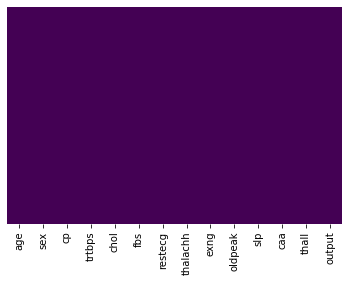

In [4]:
# Heatmap to validate data has no null values
sb.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap='viridis')

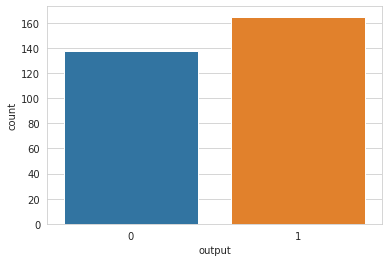

In [5]:
# Creating a countplot that shows the difference of heart attack risk - 0 meaning low chance of heart attack and 1 meaning high chance
sb.set_style('whitegrid')
cp = sb.countplot(x='output',data=df)

<AxesSubplot:xlabel='output', ylabel='count'>

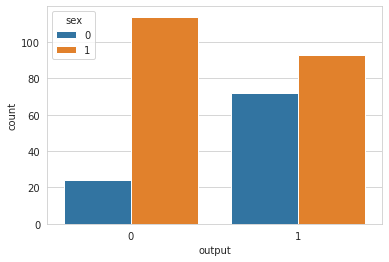

In [6]:
# Creating a countplot that shows the difference of heart attack risk based on gender
sb.countplot(x='output',hue='sex',data=df)

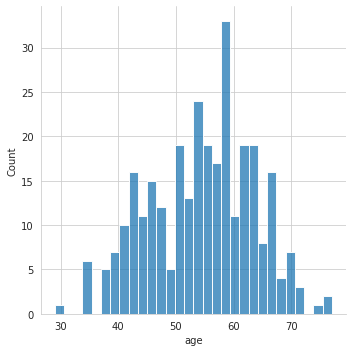

In [7]:
# Show a plot with ages of patient data
sb.displot(df['age'],kde=False,bins=30)

In [8]:
# Description of data
df.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# add training data into another variable for manipulation
df_training = df
# category_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
# continous_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# Dropping catergory columms 
# df_training = pd.get_dummies(df_training, columns = category_cols, drop_first = True)

# Dropping result value from df_training and adding it to only y value
X = df_training.drop('output', axis = 1)
y = df_training['output']

sc = StandardScaler()

# X[continous_cols] = sc.fit_transform(X[continous_cols])

# Printing head of new data 
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Training a logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
predictions = logmodel.predict(X_test)

In [13]:
# Printing out the accuracy score of the logistic regression model
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, predictions))

The test accuracy score of Logistric Regression is  0.8852459016393442


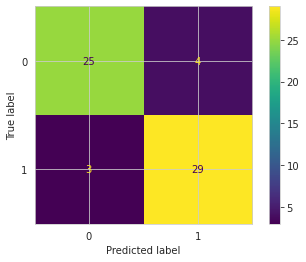

In [14]:
# Confusion matrix used to visualize perdictions by category
matrix = metrics.confusion_matrix(y_test, predictions, labels=logmodel.classes_)
matrix_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=logmodel.classes_)
matrix_disp.plot();

In [15]:
# Setting up widgets so user can interact with ml model
from ipywidgets import widgets
import warnings
warnings.filterwarnings("ignore")

#The text boxes where the user can input values.
age = widgets.FloatText(description='Age:', value='63')
sex = widgets.FloatText(description='Sex:', value='1')
cp = widgets.FloatText(description='Chest Pain Type:', value='3')
trtbps = widgets.FloatText(description='Resting BP:', value='145')
chol = widgets.FloatText(description='Cholestoral:', value='233')
fbs = widgets.FloatText(description='fasting Blood sugar:', value='1')
restecg = widgets.FloatText(description='Resting electrocardiographic results:', value='0')
thalachh = widgets.FloatText(description='Maximum heart rate:', value='150')
oldpeak = widgets.FloatText(description=' Previous peak:', value='0')
slp = widgets.FloatText(description='Slope:', value='2.3')
caa = widgets.FloatText(description='Number of major vessels:', value='0')
thall = widgets.FloatText(description='Thalium Stress Test result:', value='0')
exng = widgets.FloatText(description=' Exercise induced angina:', value='1')

# Button for user to get results back
button_pred = widgets.Button( description='Predict')
button_print = widgets.Label(value='Once values are entered, click on the predict to get results')

def clicked_button(button):
    pred = logmodel.predict([[age.value, sex.value, cp.value, trtbps.value, chol.value, 
                             fbs.value, restecg.value, thalachh.value, exng.value, oldpeak.value,
                             slp.value, caa.value, thall.value]])
    
    if(pred == 0):
         button_print.value = 'You are not at risk of a heart attack '
    else:
        button_print.value = 'YOU ARE AT RISK OF A HEART ATTACK!'
    

button_pred.on_click(clicked_button)


# Display user boxes inside a virtual box
vbox = widgets.VBox([age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak,
                    slp, caa, thall, button_pred, button_print])

print('Below is an explanation of how to input values for each category:')
print("• Age : Age of the patient\n• Sex : 0 = female | 1 = male \n• Chest Pain type(0-4) \n-1: typical angina\n-2: atypical angina\n-3: non-anginal pain\n-4: asymptomatic\n• Resting blood pressure (in mm Hg)\n• Cholestoral in mg/dl\n• Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)\n• Resting electrocardiographic results(0-2)\n-0: normal\n-1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n-2: showing probable or definite left ventricular hypertrophy by Estes criteria\n• Maximum heart rate achieved\n•Exercise induced angina (1 = yes; 0 = no)\n• Previous Peak\n• Slope(0-2)\n• Number of major vessels (0-3)\n• Thal rate(0-3)")
print('\nEnter values to see if you are at risk of a heart attack (by default there has been inserted values you can use)')      

display(vbox)


Below is an explanation of how to input values for each category:
• Age : Age of the patient
• Sex : 0 = female | 1 = male 
• Chest Pain type(0-4) 
-1: typical angina
-2: atypical angina
-3: non-anginal pain
-4: asymptomatic
• Resting blood pressure (in mm Hg)
• Cholestoral in mg/dl
• Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
• Resting electrocardiographic results(0-2)
-0: normal
-1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-2: showing probable or definite left ventricular hypertrophy by Estes criteria
• Maximum heart rate achieved
•Exercise induced angina (1 = yes; 0 = no)
• Previous Peak
• Slope(0-2)
• Number of major vessels (0-3)
• Thal rate(0-3)

Enter values to see if you are at risk of a heart attack (by default there has been inserted values you can use)
